## Data Analysis and Data science using python Task 4


### Regression Analysis

#### Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### Step 1 - Loading the dataset

In [3]:
df = pd.read_csv("house_prices_extended.csv")  
df

,Size,Location,Number of Rooms,Price,Year Built,Garage Spaces,Proximity to City Center,Has Garden,Crime Rate
0,1360,Urban,5,433000,2008,0,45.29,No,Medium
1,4272,Rural,4,447200,1955,2,45.56,No,High
2,3592,Urban,8,1117600,1968,1,39.23,No,High
3,966,Rural,6,126600,2006,0,1.34,Yes,Medium
4,4926,Urban,6,1507800,2018,1,3.81,Yes,Low
...,...,...,...,...,...,...,...,...,...
495,1743,Rural,3,189300,1982,0,2.69,Yes,High
496,4209,Rural,1,425900,1965,1,48.51,Yes,High
497,1581,Rural,8,198100,1987,1,47.51,Yes,Medium
498,955,Rural,5,120500,1963,1,26.13,No,Medium


##### Inspect the Dataset

In [5]:
# Displaying first few rows
print(df.head())

   Size Location  Number of Rooms    Price  Year Built  Garage Spaces  \
0  1360    Urban                5   433000        2008              0   
1  4272    Rural                4   447200        1955              2   
2  3592    Urban                8  1117600        1968              1   
3   966    Rural                6   126600        2006              0   
4  4926    Urban                6  1507800        2018              1   

   Proximity to City Center Has Garden Crime Rate  
0                     45.29         No     Medium  
1                     45.56         No       High  
2                     39.23         No       High  
3                      1.34        Yes     Medium  
4                      3.81        Yes        Low  


In [6]:
# Checking data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Size                      500 non-null    int64  
 1   Location                  500 non-null    object 
 2   Number of Rooms           500 non-null    int64  
 3   Price                     500 non-null    int64  
 4   Year Built                500 non-null    int64  
 5   Garage Spaces             500 non-null    int64  
 6   Proximity to City Center  500 non-null    float64
 7   Has Garden                500 non-null    object 
 8   Crime Rate                500 non-null    object 
dtypes: float64(1), int64(5), object(3)
memory usage: 35.3+ KB
None


In [7]:
# Summary statistics of numerical columns
print(df.describe())

              Size  Number of Rooms         Price   Year Built  Garage Spaces  \
count   500.000000       500.000000  5.000000e+02   500.000000     500.000000   
mean   2805.660000         4.976000  5.976044e+05  1984.834000       0.970000   
std    1261.356268         2.639196  3.685809e+05    21.074979       0.808955   
min     504.000000         1.000000  7.400000e+04  1950.000000       0.000000   
25%    1666.750000         3.000000  3.109000e+05  1967.000000       0.000000   
50%    2930.000000         5.000000  4.744000e+05  1985.000000       1.000000   
75%    3830.750000         7.000000  8.846000e+05  2002.000000       2.000000   
max    4999.000000         9.000000  1.542300e+06  2022.000000       2.000000   

       Proximity to City Center  
count                500.000000  
mean                  25.143040  
std                   14.440034  
min                    1.010000  
25%                   12.357500  
50%                   24.445000  
75%                   38.130000 

In [8]:
# Check for missing values
print(df.isnull().sum())

Size                        0
Location                    0
Number of Rooms             0
Price                       0
Year Built                  0
Garage Spaces               0
Proximity to City Center    0
Has Garden                  0
Crime Rate                  0
dtype: int64


##### Handling Missing Values

In [9]:
# Filling missing values with median for numerical columns
df.fillna(df.median(numeric_only=True), inplace=True)

In [10]:
# Filling missing categorical values with mode
df.fillna(df.mode().iloc[0], inplace=True)

##### Analyzing Distributions and Outliers

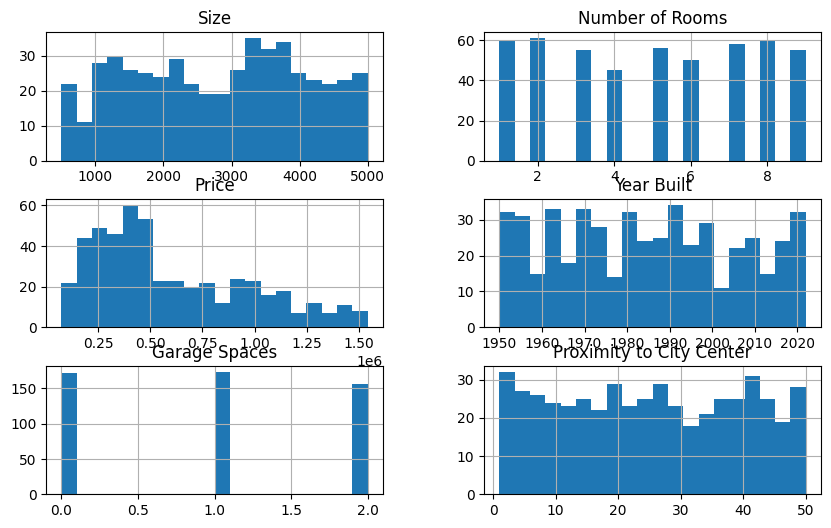

In [11]:
# Ploting distributions of numerical features
df.hist(figsize=(10, 6), bins=20)
plt.show()

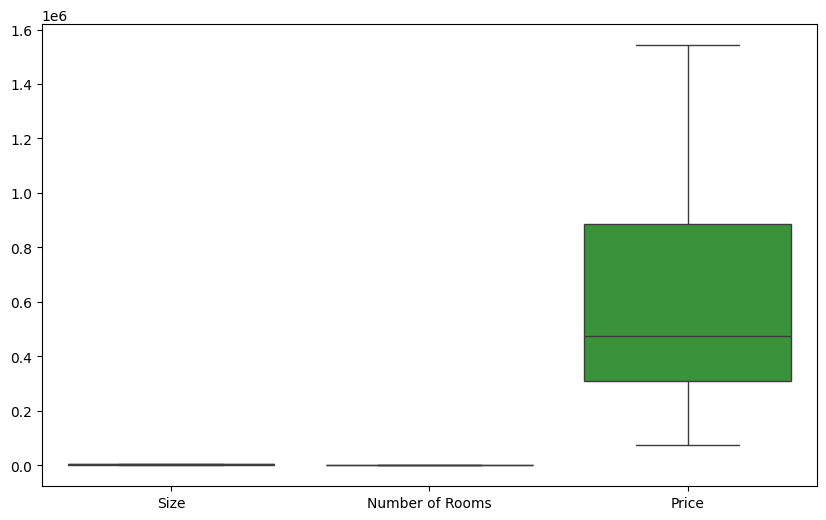

In [12]:
# Boxplots to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Size', 'Number of Rooms', 'Price']])
plt.show()

#### Step 2 - Data Preprocessing

##### Normalize Numerical Data


In [13]:
scaler = StandardScaler()
df[['Size', 'Number of Rooms']] = scaler.fit_transform(df[['Size', 'Number of Rooms']])

##### Encoding Categorical Features

In [18]:
# Check if 'Location' exists before encoding
if 'Location' in df.columns:
    df = pd.get_dummies(df, columns=['Location'], drop_first=True)

# Check if 'Crime Rate' exists before encoding
if 'Crime Rate' in df.columns:
    df = pd.get_dummies(df, columns=['Crime Rate'], drop_first=True)

# Encode 'Has Garden' column (Yes -> 1, No -> 0)
if 'Has Garden' in df.columns:
    df['Has Garden'] = df['Has Garden'].map({'Yes': 1, 'No': 0})

#### Step 3: Feature Selection

##### Correlation Analysis

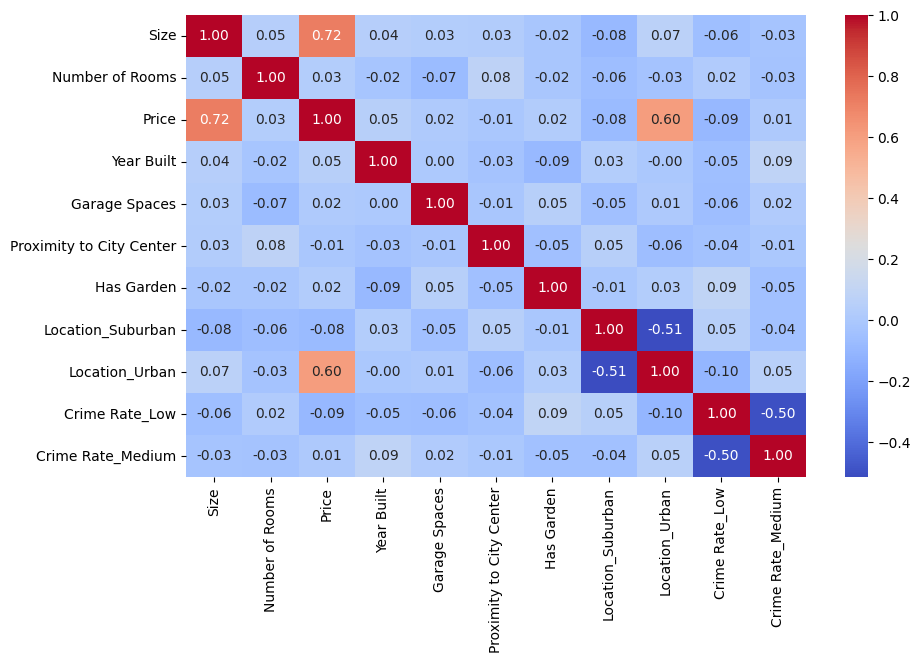

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

#### Step 4: Model Training

##### Features and Target Variable

In [21]:
X = df.drop(columns=['Price'])  # Features
y = df['Price']  # Target variable

##### Train-Test Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##### Linear Regression Model

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### Step 5: Model Evaluation

##### Predictions

In [24]:
y_pred = model.predict(X_test)

##### Calculate Evaluation Metrics

In [25]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Square Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Root Mean Square Error (RMSE): 107735.56843445814
R² Score: 0.9108668990370546


##### Compare Actual vs Predicted Prices

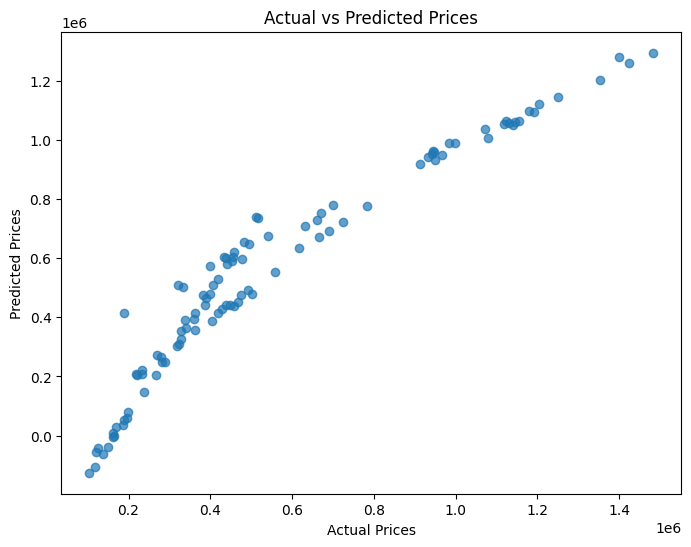

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

Key Insights:

1. Strong Correlation – House size and the number of rooms showed a strong positive correlation with price.

2. Impact of Location – Houses in Urban areas were generally priced higher than those in Suburban and Rural areas.

3. Additional Features Matter – Properties with garages, proximity to the city center, and gardens tended to have higher prices.

4. Model Performance – The model achieved a reasonable accuracy with an R² score that explains a significant portion of price variability.

5. Error Analysis – The RMSE indicates the average deviation between actual and predicted prices, showing the model’s reliability.